# Machine failure project

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import os 
import sys

In [3]:
print(os.getcwd())

c:\ML_Wakad_Weekend_9am\13 CLassificaiton Project


In [4]:
root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
print(root_path)

c:\ML_Wakad_Weekend_9am


In [5]:
if root_path not in sys.path:
    sys.path.append(root_path)

In [6]:
from utils import algo_evaluation

# Step 1 - Data ingestion

In [7]:
import pandas as pd
df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


# Target feature - Machine failure

# Step 2 - Perform basic data quality checks

In [8]:
df.shape

(136429, 14)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [12]:
df.select_dtypes(include = "object").nunique()

Product ID    9976
Type             3
dtype: int64

# Product ID should be dropped because of too many uniqye values

# Step 3 - Seperate X and Y (Machine failure)

In [13]:
X = df.drop(columns=["id", "Product ID", "Machine failure"])
Y = df["Machine failure"]

In [14]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [15]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

In [16]:
Y.value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

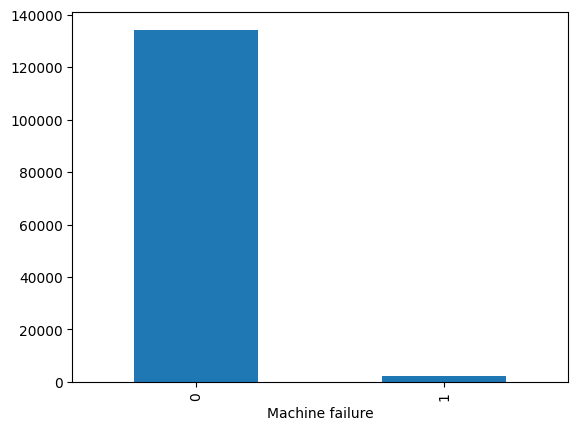

In [17]:
Y.value_counts().plot(kind="bar")

# Step 4 - apply train test split

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
xtrain.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
12407,L,301.5,310.7,1481,43.7,77,0,0,0,0,0
85011,L,300.7,309.5,1452,43.4,85,0,0,0,0,0
65292,M,298.5,309.1,1365,57.0,27,0,0,0,0,0
18478,L,301.6,310.7,1543,31.9,16,0,0,0,0,0
100267,L,298.9,308.6,1633,32.9,124,0,0,0,0,0


In [20]:
ytrain.head()

12407     0
85011     0
65292     0
18478     0
100267    0
Name: Machine failure, dtype: int64

In [21]:
xtest.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
123128,L,300.9,310.7,1368,62.0,12,0,0,0,1,0
54705,L,300.5,311.3,1543,36.0,190,0,0,0,0,0
40016,L,300.6,310.4,1499,38.5,114,0,0,0,0,0
75025,L,297.6,308.4,1502,38.5,130,0,0,0,0,0
120421,L,300.8,310.7,1539,38.5,203,0,0,0,0,0


In [22]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine failure, dtype: int64

# Step 5 - Apply preprocessing

In [23]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['Type']

In [24]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [27]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [28]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [29]:
pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [30]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
12407,0.879407,0.546161,-0.282669,0.394662,-0.426183,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0
85011,0.449463,-0.320041,-0.491809,0.359361,-0.301258,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0
65292,-0.732883,-0.608775,-1.119230,1.959702,-1.206971,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0
18478,0.933150,0.546161,0.164459,-0.993869,-1.378744,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0
100267,-0.517911,-0.969693,0.813515,-0.876197,0.307756,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0


In [31]:
xtest_pre = pre.transform(xtest)
xtrain_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
12407,0.879407,0.546161,-0.282669,0.394662,-0.426183,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0
85011,0.449463,-0.320041,-0.491809,0.359361,-0.301258,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0
65292,-0.732883,-0.608775,-1.119230,1.959702,-1.206971,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0
18478,0.933150,0.546161,0.164459,-0.993869,-1.378744,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0
100267,-0.517911,-0.969693,0.813515,-0.876197,0.307756,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0


# Step 6 - Algo evaluation

In [32]:
!uv add xgboost

Resolved 123 packages in 15ms
Audited 118 packages in 0.52ms


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
RANDOM_STATE = 42

models = [
    LogisticRegression(random_state=RANDOM_STATE),
    DecisionTreeClassifier(random_state=RANDOM_STATE),
    RandomForestClassifier(random_state=RANDOM_STATE,max_depth=3),
    HistGradientBoostingClassifier(random_state=RANDOM_STATE,max_depth=3),
    XGBClassifier(random_state=RANDOM_STATE,max_depth=3)
]

In [35]:
xtrain.values, ytrain.values

(array([['L', 301.5, 310.7, ..., 0, 0, 0],
        ['L', 300.7, 309.5, ..., 0, 0, 0],
        ['M', 298.5, 309.1, ..., 0, 0, 0],
        ...,
        ['M', 301.1, 310.7, ..., 0, 0, 0],
        ['H', 300.8, 311.4, ..., 0, 0, 0],
        ['H', 300.2, 309.8, ..., 0, 0, 0]],
       shape=(109143, 11), dtype=object),
 array([0, 0, 0, ..., 0, 0, 0], shape=(109143,)))

In [36]:
best_model, eval_df = algo_evaluation(
    models, xtrain_pre.values, ytrain.values, xtest_pre.values, ytest.values
)

{'model_name': 'LogisticRegression', 'model': LogisticRegression(random_state=42), 'cv_mean': np.float64(0.9301), 'cv_std': np.float64(0.0092), 'f1_train': 0.9303, 'f1_test': 0.9315, 'gen_err': 0.0012}
{'model_name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(random_state=42), 'cv_mean': np.float64(0.8693), 'cv_std': np.float64(0.0085), 'f1_train': 0.9975, 'f1_test': 0.8808, 'gen_err': 0.1167}
{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier(max_depth=3, random_state=42), 'cv_mean': np.float64(0.8896), 'cv_std': np.float64(0.0059), 'f1_train': 0.8843, 'f1_test': 0.8778, 'gen_err': 0.0065}
{'model_name': 'HistGradientBoostingClassifier', 'model': HistGradientBoostingClassifier(max_depth=3, random_state=42), 'cv_mean': np.float64(0.9299), 'cv_std': np.float64(0.0089), 'f1_train': 0.9303, 'f1_test': 0.9315, 'gen_err': 0.0012}
{'model_name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_

In [37]:
eval_df

,model_name,model,cv_mean,cv_std,f1_train,f1_test,gen_err
0,LogisticRegression,LogisticRegression(random_state=42),0.9301,0.0092,0.9303,0.9315,0.0012
1,HistGradientBoostingClassifier,"HistGradientBoostingClassifier(max_depth=3, ra...",0.9299,0.0089,0.9303,0.9315,0.0012
2,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9285,0.0084,0.9336,0.9305,0.0031
3,RandomForestClassifier,"(DecisionTreeClassifier(max_depth=3, max_featu...",0.8896,0.0059,0.8843,0.8778,0.0065
4,DecisionTreeClassifier,DecisionTreeClassifier(random_state=42),0.8693,0.0085,0.9975,0.8808,0.1167


In [38]:
eval_df.to_csv("eval.csv", index=False)

In [39]:
best_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Step 7 - Evaluated selected model in detail

In [40]:
best_model.score(xtrain_pre, ytrain)

0.9961884866642845

In [41]:
best_model.score(xtest_pre, ytest)

0.9961518727552591

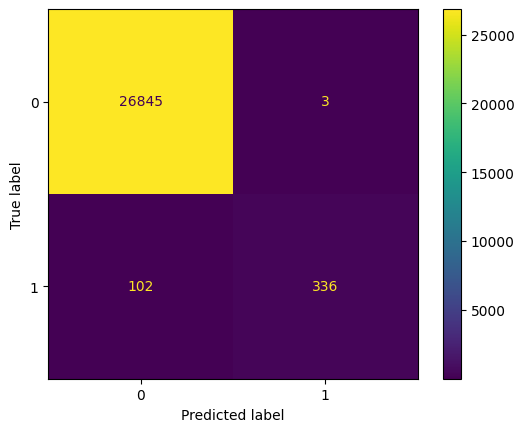

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    best_model, xtest_pre, ytest
)

In [43]:
from sklearn.metrics import classification_report

ypred_test = best_model.predict(xtest_pre)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



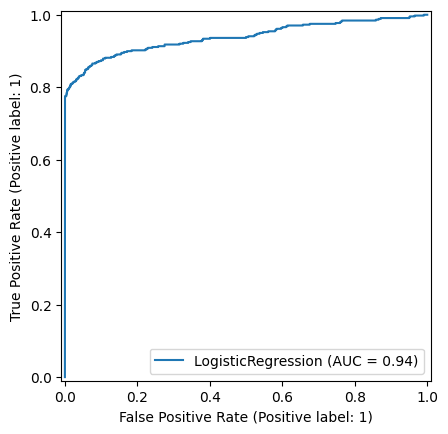

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, xtest_pre, ytest)

# Step 8 - Out of sample prediction

In [45]:
xnew = pd.read_csv("test_machine.csv")
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [46]:
best_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [48]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,1.309351,1.123629,-0.152858,-0.276069,-0.691651,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0
1,0.986893,0.762712,1.390454,-1.358653,-1.363128,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0
2,0.771921,0.329610,0.034647,-0.311371,-0.129484,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,1.0,0.0
3,0.127005,-0.247858,-0.297092,0.853584,-1.550517,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0
4,1.900524,1.701097,-0.037470,0.112249,0.151599,-0.038436,-0.071621,-0.048677,-0.063694,-0.04714,0.0,1.0


In [49]:
preds = best_model.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], shape=(90954,))

In [52]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs

array([0.00209708, 0.00104179, 0.00271243, ..., 0.00312019, 0.00252358,
       0.00214178], shape=(90954,))

In [51]:
best_model.classes_

array([0, 1])

In [53]:
res = xnew[["id"]]
res["machine_failure"] = preds
res["probability"] = probs.round(4)

In [54]:
res

,id,machine_failure,probability
0,136429,0,0.0021
1,136430,0,0.0010
2,136431,0,0.0027
3,136432,0,0.0032
4,136433,0,0.0038
...,...,...,...
90949,227378,0,0.0022
90950,227379,0,0.0004
90951,227380,0,0.0031
90952,227381,0,0.0025


In [55]:
res[res["machine_failure"] == 1]

,id,machine_failure,probability
17,136446,1,0.9925
209,136638,1,0.9966
223,136652,1,0.9902
397,136826,1,0.9976
405,136834,1,0.9991
...,...,...,...
90503,226932,1,0.9915
90665,227094,1,0.9999
90679,227108,1,0.7744
90784,227213,1,0.9827


In [56]:
res["machine_failure"].value_counts()

machine_failure
0    89848
1     1106
Name: count, dtype: int64

<Axes: xlabel='machine_failure'>

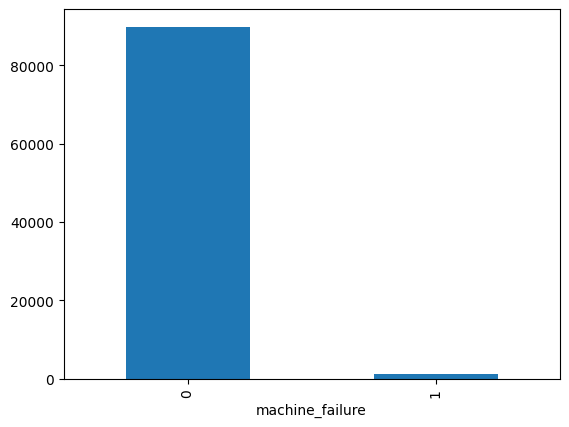

In [57]:
res["machine_failure"].value_counts().plot(kind="bar")

# Step 9 - Save the model object and pre 

In [58]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [59]:
best_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
import joblib

joblib.dump(best_model, "machine_model.joblib")

['machine_model.joblib']

In [61]:
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [62]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [63]:
m = joblib.load("machine_model.joblib")
m

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'
